In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import glob 
import os 
import cv2
import math
from keras import applications
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Convolution2D,Activation,Flatten,Dense,Dropout,MaxPool2D,BatchNormalization
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator


C:\Users\Lenovo\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
images = glob.glob('./Lit/*.*')

for i in range(len(images)): 
    try : 
        t = 'image'+str(i)+'.jpg'
        image = cv2.imread(images[i])
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        cv2.imwrite('./image_lits/{}'.format(t),cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
    except : 
        print(i)

In [4]:
path = os.path.dirname('./image_chaises/image0.jpg')
label = os.path.basename(path)

In [5]:
data = []
labels = []

for folder in ['image_chaises','image_lits','image_sofas','image_tables']:
    images = glob.glob('./Train_data/%s/*.*'%folder)

    for i in range(len(images)): 
        image = cv2.imread(images[i])
        try : 
            image = cv2.resize(image, (100,100))
            image = tf.keras.preprocessing.image.img_to_array(image)
            data.append(image)
            labels.append(folder)
        except : 
            pass
    print(len(images),folder)

300 image_chaises
115 image_lits
222 image_sofas
388 image_tables


In [6]:
import numpy as np
import pandas as pd
data = np.array(data)
label = np.array(labels)
print(data.shape)

(1025, 100, 100, 3)


In [7]:
dict_ = {'image_chaises':0,
       'image_sofas':1,
       'image_tables':2,
       'image_lits':3}
label_dict = {0: 'chaise', 1: 'sofa',2: 'table', 3: 'lit'}
label = np.vectorize(dict_.get)(label)

In [8]:
label.shape

(1025,)

In [9]:
train_images_reshaped = data.reshape((-1, 100, 100,3))
train_labels_reshaped = to_categorical(label, num_classes=4)

In [10]:
# Convolution Neural Networks (CNN)
model = Sequential()

model.add(Conv2D(8, kernel_size=(3,3), padding='same', input_shape = (100,100,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(3, 3)))

model.add(Conv2D(16, kernel_size=(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(32, kernel_size=(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(32, kernel_size=(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(4, activation='softmax'))
model.compile(optimizer='adadelta', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 100, 100, 8)       224       
_________________________________________________________________
activation_1 (Activation)    (None, 100, 100, 8)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 33, 33, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 33, 33, 16)        1168      
_________________________________________________________________
batch_normalization_1 (Batch (None, 33, 33, 16)        64        
_________________________________________________________________
activation_2 (Activation)    (None, 33, 33, 16)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 16)        0         
__________

In [11]:
model.fit(train_images_reshaped, train_labels_reshaped, epochs=10)

Epoch 1/10
1025/1025 [==============================] - 9s 9ms/step - loss: 1.2811 - acc: 0.4693
Epoch 2/10
1025/1025 [==============================] - 9s 9ms/step - loss: 0.9488 - acc: 0.6146
Epoch 3/10
1025/1025 [==============================] - 9s 9ms/step - loss: 0.8015 - acc: 0.6868
Epoch 4/10
1025/1025 [==============================] - 9s 9ms/step - loss: 0.6993 - acc: 0.7268
Epoch 5/10
1025/1025 [==============================] - 9s 9ms/step - loss: 0.6185 - acc: 0.7678
Epoch 6/10
1025/1025 [==============================] - 9s 9ms/step - loss: 0.5717 - acc: 0.7951
Epoch 7/10
1025/1025 [==============================] - 9s 9ms/step - loss: 0.4879 - acc: 0.8371
Epoch 8/10
1025/1025 [==============================] - 10s 10ms/step - loss: 0.4364 - acc: 0.8712
Epoch 9/10
1025/1025 [==============================] - 10s 10ms/step - loss: 0.3744 - acc: 0.8956
Epoch 10/10
1025/1025 [==============================] - 10s 10ms/step - loss: 0.3584 - acc: 0.9054


In [12]:
model.save_weights('cnn_model1.h5')

In [19]:
batch_size = 16

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)


test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        './Train_data/',  
        target_size=(100, 100),  
        batch_size=batch_size,
        class_mode='categorical')

model.fit_generator(
        train_generator,
        steps_per_epoch=2000 // batch_size,
        epochs=20)
model.save_weights('cnn_data_augmentation.h5')  # always save your weights after training or during training

Found 1025 images belonging to 4 classes.
Epoch 1/20
125/125 [==============================] - 25s 200ms/step - loss: 0.3020 - acc: 0.8945
Epoch 2/20
125/125 [==============================] - 24s 195ms/step - loss: 0.3189 - acc: 0.8745
Epoch 3/20
125/125 [==============================] - 24s 194ms/step - loss: 0.2799 - acc: 0.9045
Epoch 4/20
125/125 [==============================] - 24s 195ms/step - loss: 0.3043 - acc: 0.8821
Epoch 5/20
125/125 [==============================] - 24s 192ms/step - loss: 0.2638 - acc: 0.9045
Epoch 6/20
125/125 [==============================] - 24s 196ms/step - loss: 0.2662 - acc: 0.9155
Epoch 7/20
125/125 [==============================] - 24s 194ms/step - loss: 0.2464 - acc: 0.91453s - loss: 0.
Epoch 8/20
125/125 [==============================] - 24s 192ms/step - loss: 0.2503 - acc: 0.9110
Epoch 9/20
125/125 [==============================] - 24s 192ms/step - loss: 0.2471 - acc: 0.9170
Epoch 10/20
125/125 [==============================] - 25s 199m

In [21]:
batch_size = 1
test_generator = test_datagen.flow_from_directory(
    './TestData/',
    color_mode = "rgb",
    target_size=(100, 100),
    batch_size=1, 
    shuffle=True)
y_pred = model.predict_generator(test_generator, 1//batch_size, workers=4)

Found 77 images belonging to 4 classes.


[[8.6629176e-01 2.2177806e-04 1.3094801e-01 2.5383525e-03]]


Text(0.5,1,'chaise')

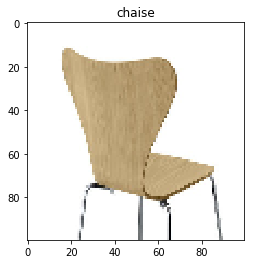

In [26]:
x_test, y_test = next(test_generator)
p = model.predict(x_test)
print(p)
p = p.argmax()
plt.imshow(x_test[0])
plt.title(label_dict[p])

In [27]:
model3 = Sequential()
model3.add(Conv2D(16, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(100,100,3)))
model3.add(Conv2D(8, (3, 3), activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.25))
model3.add(Flatten())
model3.add(Dense(32, activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(4, activation='softmax'))

model3.summary()
model3.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model3.fit(train_images_reshaped, train_labels_reshaped, epochs=10)

#test_loss, test_acc = model3.evaluate(test_images_reshaped, test_labels_reshaped)

#print('Test accuracy:', test_acc)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 98, 98, 16)        448       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 96, 96, 8)         1160      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 48, 48, 8)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 48, 48, 8)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                589856    
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
__________

[[0.0000000e+00 8.2551374e-08 9.9999988e-01 1.5529024e-20]]


Text(0.5,1,'table')

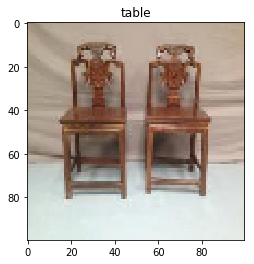

In [65]:
x_test, y_test = next(test_generator)
p = model3.predict(x_test)
print(p)
p = p.argmax()
plt.imshow(x_test[0])
plt.title(label_dict[p])

In [8]:
model = applications.VGG16(include_top=False, weights='imagenet')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0         
__________

In [10]:
 # dimensions of our images.  
img_width, img_height = 100, 100  
   
top_model_weights_path = 'bottleneck_fc_model.h5'  
train_data_dir = './train_data/'  
validation_data_dir = './TestData/'  
   
 # number of epochs to train top model  
epochs = 50  
 # batch size used by flow_from_directory and predict_generator  
batch_size = 16  

We then create the data generator for training images, and run them on the VGG16 model to save the bottleneck features for training.

In [28]:
datagen = ImageDataGenerator(rescale=1. / 255)  
   
generator = datagen.flow_from_directory(  
     train_data_dir,  
     target_size=(img_width, img_height),  
     batch_size=batch_size,  
     class_mode=None,  
     shuffle=False)  

nb_train_samples = len(generator.filenames)  
num_classes = len(generator.class_indices)  

predict_size_train = int(math.ceil(nb_train_samples / batch_size))  
bottleneck_features_train = model.predict_generator(  
     generator, predict_size_train)  

Found 1025 images belonging to 4 classes.


In [29]:
np.save('bottleneck_features_train.npy', bottleneck_features_train)

In [30]:
print(bottleneck_features_train.shape)

(1025, 3, 3, 512)


In [31]:
generator.filenames[:5]

['image_chaises\\image1.jpg',
 'image_chaises\\image10.jpg',
 'image_chaises\\image100.jpg',
 'image_chaises\\image101.jpg',
 'image_chaises\\image102.jpg']

In [32]:
generator.class_indices

{'image_chaises': 0, 'image_lits': 1, 'image_sofas': 2, 'image_tables': 3}

In [33]:
 generator = datagen.flow_from_directory(  
     './TestData/',  
     target_size=(100, 100),  
     batch_size=batch_size,  
     class_mode=None,  
     shuffle=False)  
   
 nb_validation_samples = len(generator.filenames)  
   
 predict_size_validation = int(math.ceil(nb_validation_samples /batch_size))  
   
 bottleneck_features_validation = model.predict_generator(  
     generator, predict_size_validation)  
   
 np.save('bottleneck_features_validation.npy', bottleneck_features_validation)  

Found 77 images belonging to 4 classes.


In [34]:
print(bottleneck_features_validation.shape)

(77, 3, 3, 512)


In order to train the top model, we need the class labels for each of the training/validation samples. We use a data generator for that also. We also need to convert the labels to categorical vectors

In [35]:
datagen_top = ImageDataGenerator(rescale=1./255)  
generator_top = datagen_top.flow_from_directory(  
         train_data_dir,  
         target_size=(img_width, img_height),  
         batch_size=batch_size,  
         class_mode='categorical',  
         shuffle=False)  
   
nb_train_samples = len(generator_top.filenames)  
num_classes = len(generator_top.class_indices)  
   
train_data = np.load('bottleneck_features_train.npy')  
train_labels = generator_top.classes  
train_labels = to_categorical(train_labels, num_classes=num_classes)

Found 1025 images belonging to 4 classes.


In [37]:
generator_top = datagen_top.flow_from_directory(  
         validation_data_dir,  
         target_size=(img_width, img_height),  
         batch_size=batch_size,  
         class_mode=None,  
         shuffle=False)  
   
nb_validation_samples = len(generator_top.filenames)  
   
validation_data = np.load('bottleneck_features_validation.npy')  
   
validation_labels = generator_top.classes  
validation_labels = to_categorical(validation_labels, num_classes=num_classes)    

Found 77 images belonging to 4 classes.


In [38]:
train_data.shape, train_labels.shape, validation_labels.shape

((1025, 3, 3, 512), (1025, 4), (77, 4))

In [39]:
model = Sequential()  
model.add(Flatten(input_shape=train_data.shape[1:]))  
model.add(Dense(256, activation='relu'))  
model.add(Dropout(0.5))  
model.add(Dense(num_classes, activation='softmax'))  
   
model.compile(optimizer='rmsprop',  
              loss='categorical_crossentropy', metrics=['accuracy'])  
   
history = model.fit(train_data, train_labels,  
          epochs=50,  
          batch_size=16,  
          validation_data=(validation_data, validation_labels))  
   
model.save_weights('top_model_weights.h5')  
   
(eval_loss, eval_accuracy) = model.evaluate(  
     validation_data, validation_labels, batch_size=batch_size, verbose=1)
print("[INFO] accuracy: {:.2f}%".format(eval_accuracy * 100))  
print("[INFO] Loss: {}".format(eval_loss))  

Train on 1025 samples, validate on 77 samples
Epoch 1/50
1025/1025 [==============================] - 2s 2ms/step - loss: 1.2368 - acc: 0.5776 - val_loss: 0.9070 - val_acc: 0.5844
Epoch 2/50
1025/1025 [==============================] - 2s 2ms/step - loss: 0.7066 - acc: 0.7180 - val_loss: 0.8952 - val_acc: 0.6494
Epoch 3/50
1025/1025 [==============================] - 2s 2ms/step - loss: 0.6059 - acc: 0.7639 - val_loss: 0.6703 - val_acc: 0.7143
Epoch 4/50
1025/1025 [==============================] - 2s 2ms/step - loss: 0.5062 - acc: 0.8000 - val_loss: 0.3469 - val_acc: 0.8701
Epoch 5/50
1025/1025 [==============================] - 2s 2ms/step - loss: 0.4350 - acc: 0.8390 - val_loss: 0.3381 - val_acc: 0.9091
Epoch 6/50
1025/1025 [==============================] - 2s 2ms/step - loss: 0.3588 - acc: 0.8576 - val_loss: 0.3161 - val_acc: 0.9221
Epoch 7/50
1025/1025 [==============================] - 2s 2ms/step - loss: 0.3082 - acc: 0.8907 - val_loss: 0.8866 - val_acc: 0.7013
Epoch 8/50
1025/

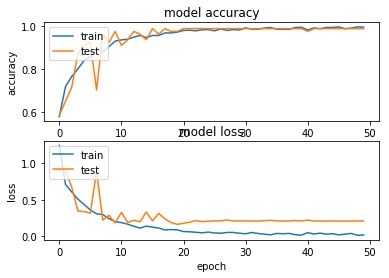

In [40]:
 plt.figure(1)  
   
 # summarize history for accuracy  
   
 plt.subplot(211)  
 plt.plot(history.history['acc'])  
 plt.plot(history.history['val_acc'])  
 plt.title('model accuracy')  
 plt.ylabel('accuracy')  
 plt.xlabel('epoch')  
 plt.legend(['train', 'test'], loc='upper left')  
   
 # summarize history for loss  
   
 plt.subplot(212)  
 plt.plot(history.history['loss'])  
 plt.plot(history.history['val_loss'])  
 plt.title('model loss')  
 plt.ylabel('loss')  
 plt.xlabel('epoch')  
 plt.legend(['train', 'test'], loc='upper left')  
 plt.show() 

In [73]:
def load_img(path):
    image_path = path

    orig = cv2.imread(image_path)  
    plt.imshow(orig)
    image = cv2.resize(orig, (100,100))  
    image = tf.keras.preprocessing.image.img_to_array(image)  

    image = image / 255  

    image = np.expand_dims(image, axis=0)
    return image

In [77]:
def predict_img(image):
    # build the VGG16 network  
    model = applications.VGG16(include_top=False, weights='imagenet')  

    bottleneck_prediction = model.predict(image)  

    model = Sequential()  
    model.add(Flatten(input_shape=bottleneck_prediction.shape[1:]))  
    model.add(Dense(256, activation='relu'))  
    model.add(Dropout(0.5))  
    model.add(Dense(num_classes, activation='sigmoid'))  

    model.load_weights('./top_model_weights.h5')  

    class_predicted = model.predict_classes(bottleneck_prediction)  
    return label_dict[class_predicted[0]]

'chaise'

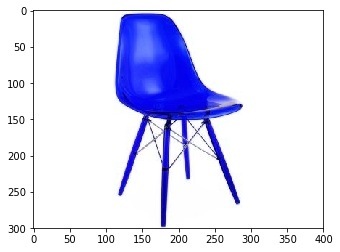

In [78]:
predict_img(load_img('./TestData/image_chaises/image1.jpg' ))

'lit'

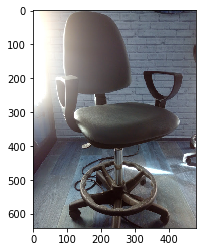

In [79]:
predict_img(load_img('./TestData/image_chaises/IMG_20180829_084101.jpg'))